# Análise dos dados de filmes e séries da Netflix
Netflix é uma das plataformas de streaming de mídia e vídeo mais populares. Este conjunto de dados tabulares consiste em listas de todos os filmes e séries disponíveis na Netflix, juntamente com detalhes como elenco, diretores, classificações, ano de lançamento, duração, etc.

## Dicionário de dados
|CAMPO|DESCRIÇÃO|
|-|-|
|show_id|ID exclusivo para cada filme/programa de TV (série)|
|type|Identificador - um filme ou programa de TV (série)|
|title|Título do filme/programa de TV (série)|
|director|Diretor|
|cast|Atores envolvidos no filme/show|
|country|País onde foi produzido|
|date_added|Data em que foi adicionado à Netflix|
|release_year|Ano de lançamento real|
|rating|Classificação|
|duration|Duração Total - em minutos ou número de temporadas|
|listed_in|Gênero|
|description|Descrição|

## Entendimento dos dados


In [1]:
# Importando Bilbiotecas
import locale

# definir o locale para português do Brasil
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# Apresenta os dados no notebook
%matplotlib inline

import seaborn as sns
# Estilo dos gráficos
sns.set_style("darkgrid")
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
# Paleta de cores
paleta_netflix = ['#221f1f', '#b20710', '#e50914','#f5f5f1']
paleta_netflix_black = ['#000000', '#161616', '#2B2B2B', '#404040', '#575757']
paleta_netflix_red = ['#73050A', '#FF0A16', '#B20710', '#BF0811', '#99060D']

import plotly.express as px

from PIL import Image
from wordcloud import WordCloud

In [3]:
#Tamanho da amostra

df = pd.read_csv("data/netflix_titles.csv")
df.shape

(8807, 12)

In [4]:
#Tipagem dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#Verificando os tipos de dados

print("Tipos de dados e sua frequência\n{}".format(df.dtypes.value_counts()))

Tipos de dados e sua frequência
object    11
int64      1
dtype: int64


In [6]:
#Verificação qtde de nulos

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
#Exibir amostra de dados

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
# Análise dos dados nulos

df.loc[df["director"].isnull()]
df.loc[df["cast"].isnull()]
df.loc[df["country"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [9]:
#Verificando dados nulos por registro e retornando a maior quantidade

df.isna().sum(axis=1).max()

3

In [10]:
#Verificando a Estatística Básica dos dados numéricos

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [9]:
df.groupby(by=["type", "duration"]).count()

show_id  title  director  cast  country  date_added  \
type    duration                                                         
Movie   10 min           1      1         0     1        1           1   
        100 min        108    108       104    98      103         108   
        101 min        116    116       115   110      110         116   
        102 min        122    122       120   118      117         122   
        103 min        114    114       112   108      109         114   
...                    ...    ...       ...   ...      ...         ...   
TV Show 5 Seasons       65     65         6    65       64          64   
        6 Seasons       33     33         3    32       33          33   
        7 Seasons       23     23         1    23       22          23   
        8 Seasons       17     17         3    16       16          17   
        9 Seasons        9      9         3     9        8           9   

                   release_year  rating  listed_in  description  
type    duration                                                 
Movie   10 min                1       1          1            1  
        100 min             108     108        108          108  
        101 min             116     116        116          116  
        102 min             122     122        122          122  
        103 min             114     114        114          114  
...                         ...     ...        ...          ...  
TV Show 5 Seasons            65      65         65           65  
        6 Seasons            33      33         33           33  
        7 Seasons            23      23         23           23  
        8 Seasons            17      17         17           17  
        9 Seasons             9       9          9            9  

[220 rows x 10 columns]

In [14]:
#Verificando formato para a 'date_added' (data em que foi adicionado na Netflix)

df["date_added"][0:3]

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
Name: date_added, dtype: object

In [15]:
#Verificando a quantidade por tipo de filmes e duração. Para verificar formato da duração do filme entre minutos e temporadas.

df[["type", "duration", "show_id"]].groupby(by=["type", "duration"]).count()

show_id
type    duration          
Movie   10 min           1
        100 min        108
        101 min        116
        102 min        122
        103 min        114
...                    ...
TV Show 5 Seasons       65
        6 Seasons       33
        7 Seasons       23
        8 Seasons       17
        9 Seasons        9

[220 rows x 1 columns]

In [16]:
#Verificando o formato e a quantidade para os diretores

df["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [17]:
#Verificando o formato e a quantidade para os atores

df["cast"].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [18]:
#Verificando o formato e a quantidade para a classificação indicativa

df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [19]:
#Verificando o formato e a quantidade para a classificação do tema

df["listed_in"].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [20]:
#Verificando formato para a 'description' (descrição do filme e série)

print(df["description"][0], end="\n\n")
print(df["description"][1], end="\n\n")
print(df["description"][2])

As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.

After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.

To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.


## Preparação dos dados

In [21]:
# Correção no formato da data adicionada na Netflix (date_added).
df["date_added_aux"] = pd.to_datetime(df['date_added'])

# Criar coluna mês adicionada na Netflix a partir de (date_added).
# mês numérico
df['month_added_num'] = df['date_added_aux'].dt.month.astype('Int64')
df['month_added_num'] = df['month_added_num'].fillna(np.nan)

# mês carácter
df['month_added_char'] = df['date_added_aux'].dt.month.astype('Int64').astype(str)
df['month_added_char'].replace('<NA>', 'N/A', inplace  = True)

# nome do mês
df['month_name_added_char'] = df['date_added_aux'].dt.month_name().astype(str)
df['month_name_added_char'].replace('nan', 'N/A', inplace  = True)

# df['month_name_added_char2'] = df['date_added_aux'].dt.strftime('%B').astype(str)
# df['month_name_added_char2'].replace('nan', 'N/A', inplace  = True)

# Criar coluna ano adicionada na Netflix a partir de (date_added)
# ano numérico
df['year_added_num'] = df['date_added_aux'].dt.year.astype('Int64')
df['year_added_num'] = df['year_added_num'].fillna(np.nan)

# ano carácter
df['year_added_char'] = df['date_added_aux'].dt.year.astype('Int64').astype(str)
df['year_added_char'].replace('<NA>', 'N/A', inplace  = True)


print(f"Nome do mês: {list(df['month_name_added_char'].unique())}", end="\n\n")
print(f"Número do mês: {list(df['month_added_num'].unique())}", end="\n\n")
print(f"Ano: {list(df['year_added_num'].unique())}", end="\n\n")
print(f"Ano carácter: {list(df['year_added_char'].unique())}")

Nome do mês: ['September', 'August', 'July', 'June', 'May', 'April', 'March', 'February', 'January', 'December', 'November', 'October', 'N/A']

Número do mês: [9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, <NA>]

Ano: [2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2009, 2008, <NA>, 2010]

Ano carácter: ['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2009', '2008', 'N/A', '2010']


In [24]:
# Correção do tipo para a duração (duration).
df['duration_char'] = df['duration'].apply(lambda x: str(x).split(" ")[0])
df['duration_char'].replace('nan', 'N/A',inplace  = True)
df['duration_num'] = df['duration_char'].replace('N/A', np.nan).astype('Int64')

print(f"Tempo de Duração: {list(df['duration_num'].unique())[:10]}", end="\n\n")
print(f"Tempo de Duração em carácter: {list(df['duration_char'].unique())[:10]}")

Tempo de Duração: [90, 2, 1, 91, 125, 9, 104, 127, 4, 67]

Tempo de Duração em carácter: ['90', '2', '1', '91', '125', '9', '104', '127', '4', '67']


In [25]:
# Ajuste para o quantitativo de classificação indicativa (rating).
df['rating'] = df['rating'].astype(str)
df['rating'].replace('nan', 'N/A', inplace  = True)
df['rating'].replace('66 min', 'N/A', inplace  = True)
df['rating'].replace('74 min', 'N/A', inplace  = True)
df['rating'].replace('84 min', 'N/A', inplace  = True)

# Classificação Indicativa disponível em 'https://help.netflix.com/pt/node/2064/us'
class_indicative_desc = {'TV-MA':'Não recomendado para menores de 17 anos',
                         'TV-14':'Não recomendado para menores de 14 anos',
                         'TV-PG':'Orientação parental sugerida',
                         'R':'Restrito. Pode ser impróprio para menores de 17 anos',
                         'PG-13':'Pode ser impróprio para menores de 13 anos',
                         'TV-Y7':'Adequado para maiores de 7 anos',
                         'TV-Y':'Conteúdo infantil',
                         'PG':'Orientação parental sugerida',
                         'TV-G':'Adequado para o público em geral',
                         'NR':'Restrito. Pode ser impróprio para menores de 17 anos',
                         'G':'Adequado para o público em geral',
                         'N/A':'Sem Informação',
                         'TV-Y7-FV':'Não recomendado para menores de 7 anos com violência fantasiosa',
                         'NC-17':'Impróprio para menores de 17 anos',
                         'UR':'Não classificado'}

class_indicative_perfil = {'TV-MA':'Adults',
                           'TV-14':'Teens',
                           'TV-PG':'Kids',
                           'R':'Adults',
                           'PG-13':'Teens',
                           'TV-Y7':'Kids',
                           'TV-Y':'Kids',
                           'PG':'Kids',
                           'TV-G':'Kids',
                           'NR':'Adults',
                           'G':'Kids',
                           'N/A':'Sem Informação',
                           'TV-Y7-FV':'Kids',
                           'NC-17':'Adults',
                           'UR':'Não classificado'}

# Cria coluna de classificação indicativa descrição e perfil.
df["rating_desc"] = df["rating"].replace(class_indicative_desc)
df["rating_profile"] = df["rating"].replace(class_indicative_perfil)

print(f"Descrição: {list(df['rating_desc'].unique())[:10]}", end="\n\n")
print(f"Classificação por perfil: {list(df['rating_profile'].unique())[:10]}")

Descrição: ['Pode ser impróprio para menores de 13 anos', 'Não recomendado para menores de 17 anos', 'Orientação parental sugerida', 'Não recomendado para menores de 14 anos', 'Conteúdo infantil', 'Adequado para maiores de 7 anos', 'Restrito. Pode ser impróprio para menores de 17 anos', 'Adequado para o público em geral', 'Impróprio para menores de 17 anos', 'Sem Informação']

Classificação por perfil: ['Teens', 'Adults', 'Kids', 'Sem Informação', 'Não classificado']


In [26]:
# Ajuste para o quantitativo de diretores (director).
df['director'] = df['director'].astype(str)
df['director'].replace('nan', 'N/A', inplace  = True)

qtd_diretor = df['director'].str.get_dummies(', ').sum()

df_qtd_diretor = pd.DataFrame({'diretor':qtd_diretor.index, 'qtd':qtd_diretor.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_diretor

,diretor,qtd
0,N/A,2634
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
...,...,...
4989,Brandon Camp,1
4990,Juan Antin,1
4991,Juan Antonio de la Riva,1
4992,Juan Camilo Pinzon,1


In [14]:
# Ajuste para o quantitativo de atores (cast).
df['cast'] = df['cast'].astype(str)
df['cast'].replace('nan', 'N/A', inplace  = True)

qtd_ator = df['cast'].str.get_dummies(', ').sum()

df_qtd_ator = pd.DataFrame({'ator':qtd_ator.index, 'qtd':qtd_ator.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_ator

,ator,qtd
0,N/A,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Takahiro Sakurai,32
...,...,...
36435,Jamie Lee,1
36436,Jamie Kenna,1
36437,Jamie Kaler,1
36438,Jamie Johnston,1


In [16]:
# Ajuste para o quantitativo de classificação do genero (listed_in).
df['listed_in'] = df['listed_in'].astype(str)
df['listed_in'].replace('nan', 'N/A', inplace  = True)

qtd_genero = df['listed_in'].str.get_dummies(', ').sum()

df_qtd_genero = pd.DataFrame({'genero':qtd_genero.index, 'qtd':qtd_genero.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_genero

,genero,qtd
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [17]:
# Ajuste para o quantitativo por país (country)
df['country'] = df['country'].astype(str)
df['country'].replace('nan', 'N/A', inplace  = True)

qtd_pais = df['country'].str.get_dummies(', ').sum()

df_qtd_pais = pd.DataFrame({'pais':qtd_pais.index, 'qtd':qtd_pais.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_pais

,pais,qtd
0,United States,3689
1,India,1046
2,N/A,831
3,United Kingdom,804
4,Canada,445
...,...,...
122,Kazakhstan,1
123,Jamaica,1
124,Slovakia,1
125,Ethiopia,1


In [18]:
# Ajuste para o quantitativo de classificação indicativa (rating).
df['rating'] = df['rating'].astype(str)
df['rating'].replace('nan', 'N/A', inplace  = True)
df['rating'].replace('66 min', 'N/A', inplace  = True)
df['rating'].replace('74 min', 'N/A', inplace  = True)
df['rating'].replace('84 min', 'N/A', inplace  = True)

qtd_class_ind = df['rating'].str.get_dummies(', ').sum()

df_qtd_class_ind = pd.DataFrame({'classificacao_indicativa':qtd_class_ind.index, 'qtd':qtd_class_ind.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_class_ind

,classificacao_indicativa,qtd
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [27]:
# Segmentação entre filmes e séries.
# Filmes
df_filmes = df.loc[df["type"] == "Movie"]
print(f"Filmes: {df_filmes.shape}")

# Séries
df_series = df.loc[df["type"] != "Movie"]
print(f"Séries: {df_series.shape}")

Filmes: (6131, 23)
Séries: (2676, 23)


In [30]:
# Quantitativo de diretores (director).
# Filmes
filmes_qtd_diretor = df_filmes['director'].str.get_dummies(', ').sum()

df_filmes_qtd_diretor = pd.DataFrame({'diretor':filmes_qtd_diretor.index, 'qtd':filmes_qtd_diretor.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_filmes_qtd_diretor.insert(0, "type", "Movie")

# Séries
series_qtd_diretor = df_series['director'].str.get_dummies(', ').sum()

df_series_qtd_diretor = pd.DataFrame({'diretor':series_qtd_diretor.index, 'qtd':series_qtd_diretor.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_series_qtd_diretor.insert(0, "type", "TV Show")

df_qtd_diretor = pd.concat([df_filmes_qtd_diretor, df_series_qtd_diretor], ignore_index=True)
df_qtd_diretor

,type,diretor,qtd
0,Movie,N/A,188
1,Movie,Rajiv Chilaka,22
2,Movie,Jan Suter,21
3,Movie,Raúl Campos,19
4,Movie,Suhas Kadav,16
...,...,...,...
5073,TV Show,Houda Benyamina,1
5074,TV Show,Hong Won-ki,1
5075,TV Show,Hiroyuki Seshita,1
5076,TV Show,Hikaru Toda,1


In [31]:
# Quantitativo de atores (cast)

#filmes
filmes_qtd_ator = df_filmes['cast'].str.get_dummies(', ').sum()

df_filmes_qtd_ator = pd.DataFrame({'ator':filmes_qtd_ator.index, 'qtd':filmes_qtd_ator.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_filmes_qtd_ator.insert(0, "type", "Movie")

#séries
series_qtd_ator = df_series['cast'].str.get_dummies(', ').sum()

df_series_qtd_ator = pd.DataFrame({'ator':series_qtd_ator.index, 'qtd':series_qtd_ator.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_series_qtd_ator.insert(0, "type", "TV Show")

df_qtd_ator = pd.concat([df_filmes_qtd_ator, df_series_qtd_ator], ignore_index=True)
df_qtd_ator

,type,ator,qtd
0,Movie,Anupam Kher,42
1,Movie,Shah Rukh Khan,35
2,Movie,Naseeruddin Shah,32
3,Movie,Akshay Kumar,30
4,Movie,Om Puri,30
...,...,...,...
40809,TV Show,Ivy Yin,1
40810,TV Show,Iván Pellicer,1
40811,TV Show,Iván Álvarez de Araya,1
40812,TV Show,Iza Moreira,1


In [32]:
# Quantitativo da classificação do gênero (listed_in).

#filmes
filmes_qtd_genero = df_filmes['listed_in'].str.get_dummies(', ').sum()

df_filmes_qtd_genero = pd.DataFrame({'genero':filmes_qtd_genero.index, 'qtd':filmes_qtd_genero.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_filmes_qtd_genero.insert(0, "type", "Movie")

#séries
series_qtd_genero = df_series['listed_in'].str.get_dummies(', ').sum()

df_series_qtd_genero = pd.DataFrame({'genero':series_qtd_genero.index, 'qtd':series_qtd_genero.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_series_qtd_genero.insert(0, "type", "TV Show")

df_qtd_genero = pd.concat([df_filmes_qtd_genero, df_series_qtd_genero], ignore_index=True)
df_qtd_genero

,type,genero,qtd
0,Movie,International Movies,2752
1,Movie,Dramas,2427
2,Movie,Comedies,1674
3,Movie,Documentaries,869
4,Movie,Action & Adventure,859
5,Movie,Independent Movies,756
6,Movie,Children & Family Movies,641
7,Movie,Romantic Movies,616
8,Movie,Thrillers,577
9,Movie,Music & Musicals,375


In [33]:
# Quantitativo por país (country).

#filmes
filmes_qtd_pais = df_filmes['country'].str.get_dummies(', ').sum()

df_filmes_qtd_pais = pd.DataFrame({'country':filmes_qtd_pais.index, 'qtd':filmes_qtd_pais.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_filmes_qtd_pais.insert(0, "type", "Movie")

#séries
series_qtd_pais = df_series['country'].str.get_dummies(', ').sum()

df_series_qtd_pais = pd.DataFrame({'country':series_qtd_pais.index, 'qtd':series_qtd_pais.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_series_qtd_pais.insert(0, "type", "TV Show")

df_qtd_pais = pd.concat([df_filmes_qtd_pais, df_series_qtd_pais], ignore_index=True)
df_qtd_pais

,type,country,qtd
0,Movie,United States,2751
1,Movie,India,962
2,Movie,United Kingdom,532
3,Movie,Canada,319
4,Movie,France,303
...,...,...,...
181,TV Show,Cuba,1
182,TV Show,Cyprus,1
183,TV Show,Hungary,1
184,TV Show,Mauritius,1


In [34]:
# Quantitativo por ano e mês adicionada na Netflix.

df_qtd_ano_mes_added = df.groupby(by=['type', 'year_added_num', 'year_added_char', 'month_added_char', 'month_name_added_char'], as_index=False)['show_id'].count()
df_qtd_ano_mes_added.rename(columns={'show_id':'qtd'}, inplace=True)
df_qtd_ano_mes_added

,type,year_added_num,year_added_char,month_added_char,month_name_added_char,qtd
0,Movie,2008,2008,1,January,1
1,Movie,2009,2009,11,November,1
2,Movie,2009,2009,5,May,1
3,Movie,2010,2010,11,November,1
4,Movie,2011,2011,10,October,11
...,...,...,...,...,...,...
188,TV Show,2021,2021,5,May,38
189,TV Show,2021,2021,6,June,83
190,TV Show,2021,2021,7,July,88
191,TV Show,2021,2021,8,August,61


In [35]:
# Gero um dicionário para substituir os campos de home_ownership, addr_state e purpose.

def nome_mes(mes):
  mapping_dict1 = {
        "1": "01-JAN",
        "2": "02-FEV",
        "3": "03-MAR", 
        "4": "04-ABR", 
        "5": "05-MAI", 
        "6": "06-JUN",
        "7": "07-JUL",
        "8": "08-AGO",
        "9": "09-SET",
        "10": "10-OUT",
        "11": "11-NOV",
        "12": "12-DEZ"}
  return mapping_dict1[mes]

df_qtd_ano_mes_added['nome_mes_extracao'] = df_qtd_ano_mes_added["month_added_char"].apply(nome_mes)
df_qtd_ano_mes_added

,type,year_added_num,year_added_char,month_added_char,month_name_added_char,qtd,nome_mes_extracao
0,Movie,2008,2008,1,January,1,01-JAN
1,Movie,2009,2009,11,November,1,11-NOV
2,Movie,2009,2009,5,May,1,05-MAI
3,Movie,2010,2010,11,November,1,11-NOV
4,Movie,2011,2011,10,October,11,10-OUT
...,...,...,...,...,...,...,...
188,TV Show,2021,2021,5,May,38,05-MAI
189,TV Show,2021,2021,6,June,83,06-JUN
190,TV Show,2021,2021,7,July,88,07-JUL
191,TV Show,2021,2021,8,August,61,08-AGO


In [36]:
df_qtd_ano_mes_added_filmes = df_qtd_ano_mes_added.loc[df_qtd_ano_mes_added["type"] == "Movie"]
df_qtd_ano_mes_added_filmes = pd.pivot_table(data=df_qtd_ano_mes_added_filmes, values="qtd", index=["nome_mes_extracao"], columns=["year_added_char"], aggfunc=np.sum, fill_value=0)
df_qtd_ano_mes_added_filmes.sort_index()

year_added_char,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
nome_mes_extracao,,,,,,,,,,,,,,
01-JAN,1,0,0,0,0,0,2,1,15,58,105,116,152,96
02-FEV,0,0,0,0,1,0,1,3,9,65,63,103,72,65
03-MAR,0,0,0,0,0,0,0,3,14,87,138,119,93,75
04-ABR,0,0,0,0,0,0,1,1,14,66,87,119,127,135
05-MAI,0,1,0,1,0,0,0,5,9,63,70,91,105,94
06-JUN,0,0,0,0,0,0,1,4,11,65,50,122,115,124
07-JUL,0,0,0,0,0,0,1,5,19,45,125,98,103,169
08-AGO,0,0,0,0,0,0,1,2,23,77,130,87,82,117
09-SET,0,0,0,1,0,1,1,6,29,81,81,86,115,118


In [37]:
df_qtd_ano_mes_added_series = df_qtd_ano_mes_added.loc[df_qtd_ano_mes_added["type"] != "Movie"]
df_qtd_ano_mes_added_series = pd.pivot_table(data=df_qtd_ano_mes_added_series, values="qtd", index=["nome_mes_extracao"], columns=["year_added_char"], aggfunc=np.sum, fill_value=0)
df_qtd_ano_mes_added_series.sort_index()

year_added_char,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
nome_mes_extracao,,,,,,,,,,
01-JAN,0,0,0,0,28,14,24,37,53,36
02-FEV,1,0,1,1,6,17,24,45,42,44
03-MAR,0,1,0,2,3,38,35,53,44,37
04-ABR,0,0,1,4,8,27,28,43,50,53
05-MAI,0,0,0,1,4,23,27,48,52,38
06-JUN,0,0,0,2,7,29,28,46,41,83
07-JUL,0,0,0,2,9,34,27,59,43,88
08-AGO,0,1,0,0,11,38,34,44,47,61
09-SET,0,1,0,1,19,32,43,37,53,65


In [38]:
# Quantitativo por ano e mês de lançamento

df_qtd_ano_mes_release_year = df.groupby(by=['type', 'release_year'], as_index=False)['show_id'].count()
df_qtd_ano_mes_release_year.rename(columns={'show_id':'qtd'}, inplace=True)
df_qtd_ano_mes_release_year

,type,release_year,qtd
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


## Análise Exploratória dos Dados - EDA
- Quantidade por tipo?
- Quantidade por ano?
- Quais são as séries mais atuais e as mais antigas?
- Qual filme e série possuem maior duração de tempo?
- Qual classificação de filme ou série aparece mais?
- Qual o país com a maior quantidade de filmes e séries?

In [94]:
paleta_netflix=['#221f1f', '#b20710', '#e50914']
sns.set_palette(paleta_netflix)
sns.set_style("darkgrid")

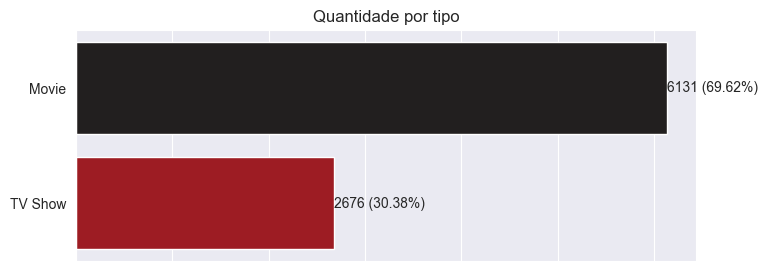

In [72]:
#Quantidade por tipo?

plt.figure(figsize=(8,3))
ax = sns.countplot(data=df, y='type',
                   order=df['type'].value_counts(ascending=False).index)

type_values = df['type'].value_counts(ascending=False).values
type_perc_values = df['type'].value_counts(ascending=False, normalize=True).values * 100
type_labels = [f'{value[0]} ({value[1]:1.2f}%)' for value in zip(type_values, type_perc_values)]
ax.bar_label(container=ax.containers[0], labels=type_labels)

plt.title("Quantidade por tipo")
plt.xlabel(None)
plt.ylabel(None)
ax.set(xticklabels=[])
plt.show()

C:\Users\Luiza Lovo\AppData\Local\Temp\ipykernel_1232\996748571.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df_qtd_ano_mes_release_year,


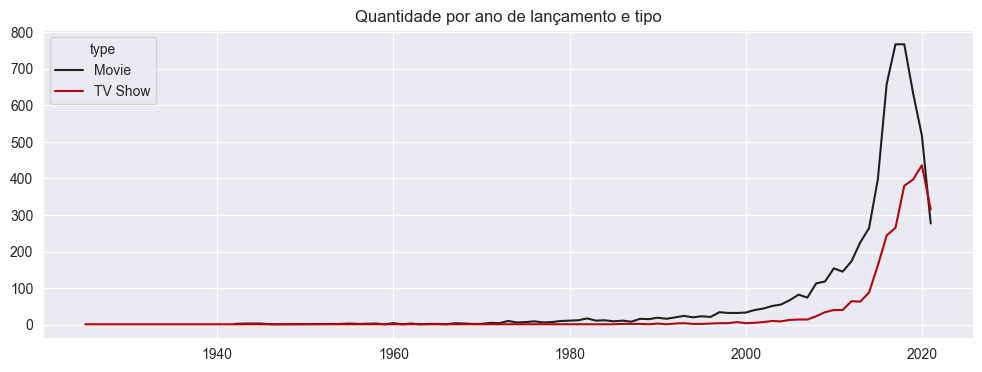

In [73]:
#Quantidade por ano?

plt.figure(figsize=(12,4))
sns.lineplot(data=df_qtd_ano_mes_release_year, 
            x='release_year', 
            y='qtd',
            hue='type',
            palette=paleta_netflix)

plt.title("Quantidade por ano de lançamento e tipo")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

C:\Users\Luiza Lovo\AppData\Local\Temp\ipykernel_1232\1072445232.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df_qtd_ano_mes_added,


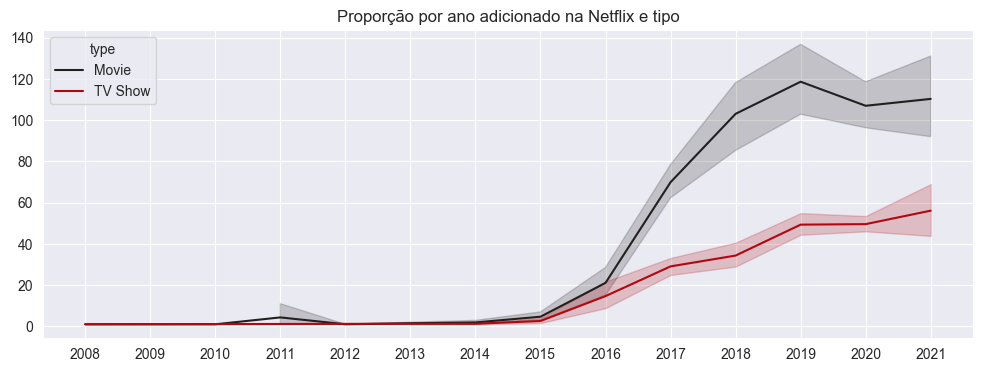

In [74]:
#Proporção por ano adicionado e tipo

plt.figure(figsize=(12,4))
sns.lineplot(data=df_qtd_ano_mes_added,
             x='year_added_char',
             y='qtd',
             hue='type',
             palette=paleta_netflix)
plt.title("Proporção por ano adicionado na Netflix e tipo")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

C:\Users\Luiza Lovo\AppData\Local\Temp\ipykernel_1232\234689594.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df_qtd_ano_mes_added,


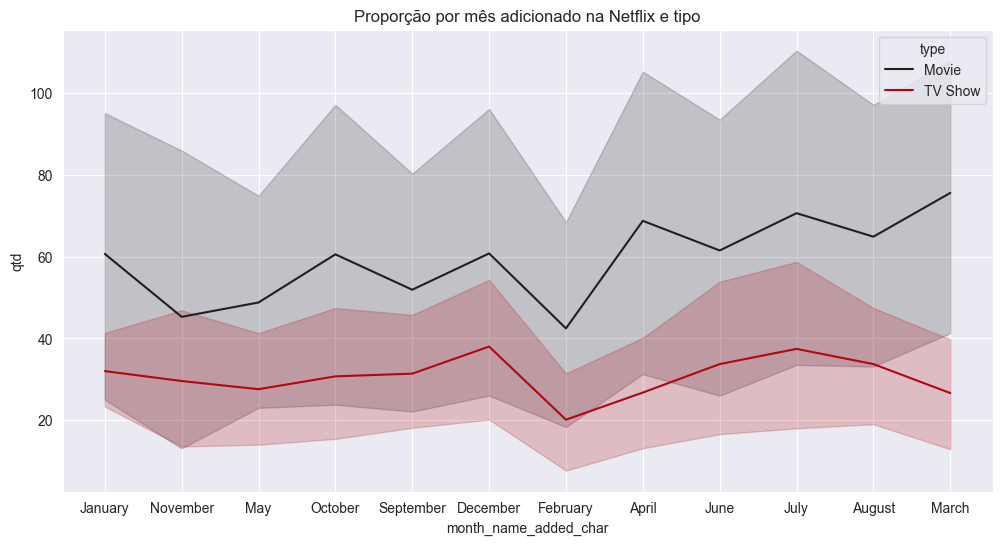

In [75]:
#Proporção por ano, mês adicionado e tipo

plt.figure(figsize=(12,6))
sns.lineplot(data=df_qtd_ano_mes_added, 
            x='month_name_added_char', 
            y='qtd',
            hue='type',
            markers=True,
            dashes=False,
            palette= paleta_netflix)
plt.title("Proporção por mês adicionado na Netflix e tipo")
plt.show()

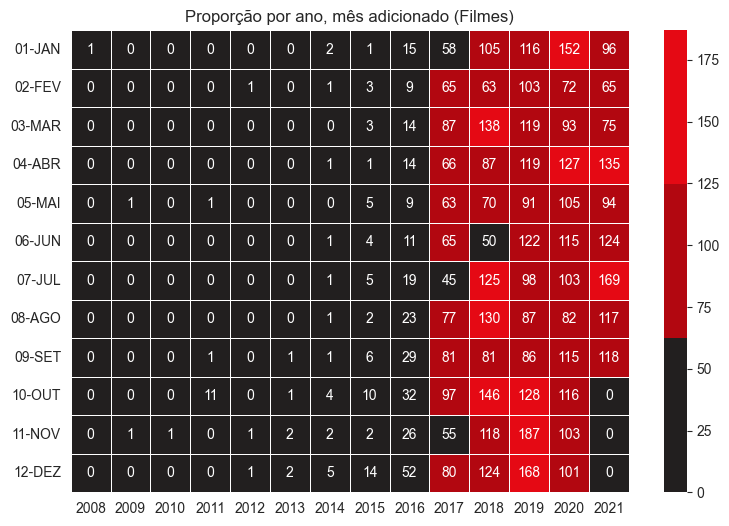

In [95]:
#Proporção por ano, mês adicionado

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_qtd_ano_mes_added_filmes,
            annot=True,
            fmt="d",
            linewidths=.5,
            ax=ax,
            cmap=paleta_netflix)
plt.title("Proporção por ano, mês adicionado (Filmes)")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

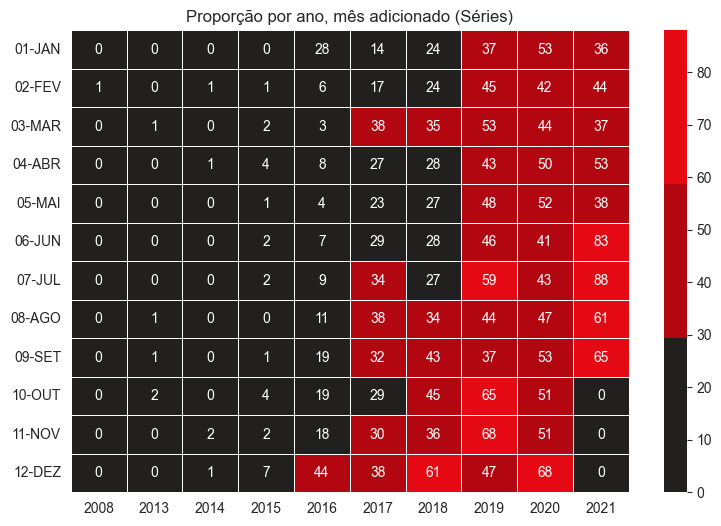

In [77]:
# Proporção por ano, mês adicionado

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_qtd_ano_mes_added_series,
            annot=True,
            fmt="d",
            linewidths=.5,
            ax=ax,
            cmap=paleta_netflix)
plt.title("Proporção por ano, mês adicionado (Séries)")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

C:\Users\Luiza Lovo\AppData\Local\Temp\ipykernel_1232\1347404186.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=filmes, x='duration_num', ax=ax[0], palette=paleta_netflix)
C:\Users\Luiza Lovo\anaconda3\envs\portifolio\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\Luiza Lovo\anaconda3\envs\portifolio\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
C:\Users\Luiza Lovo\AppData\Local\Temp\ipykernel_1232\1347404186.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=series, x='duration_num', ax=ax[1], palette=pal

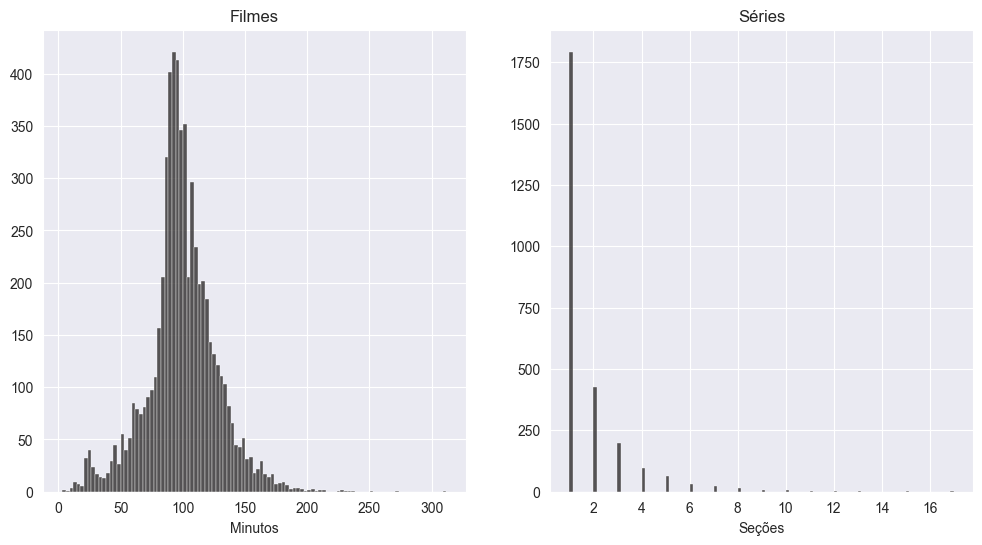

In [51]:
# Qual filme e série possuem maior duração de tempo?
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

filmes = df.loc[df['type'] == 'Movie']
series = df.loc[df['type'] == 'TV Show']

sns.histplot(data=filmes, x='duration_num', ax=ax[0], palette=paleta_netflix)
ax[0].set_title('Filmes')
ax[0].set_xlabel("Minutos")
ax[0].set_ylabel(None)

sns.histplot(data=series, x='duration_num', ax=ax[1], palette=paleta_netflix)
ax[1].set_title('Séries')
ax[1].set_xlabel("Seções")
ax[1].set_ylabel(None)

# fig.subtitle("Tempo de duração por tipo")
plt.show()

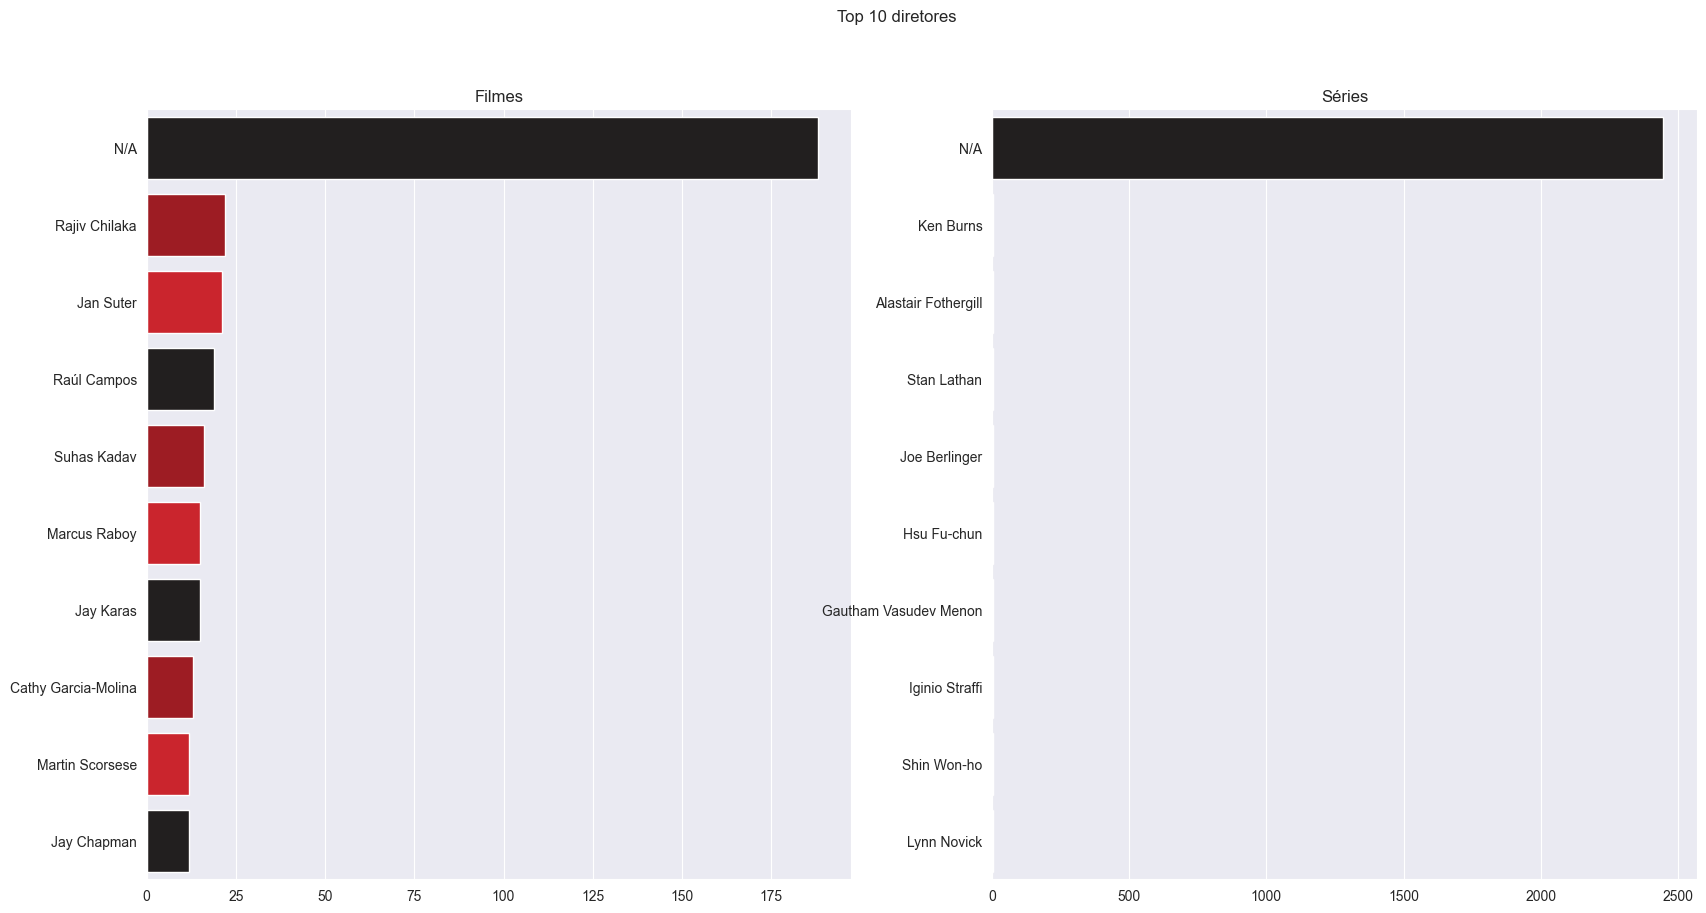

In [52]:
#Top 10 diretores

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

sns.barplot(data=df_qtd_diretor.loc[df_qtd_diretor.type == "Movie"][:10], x="qtd", y="diretor", palette=paleta_netflix, ax=axes[0])
axes[0].set_title('Filmes')
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)

sns.barplot(data=df_qtd_diretor.loc[df_qtd_diretor.type != "Movie"][:10], x="qtd", y="diretor", palette=paleta_netflix, ax=axes[1])
axes[1].set_title('Séries')
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)

fig.suptitle("Top 10 diretores")
plt.show()

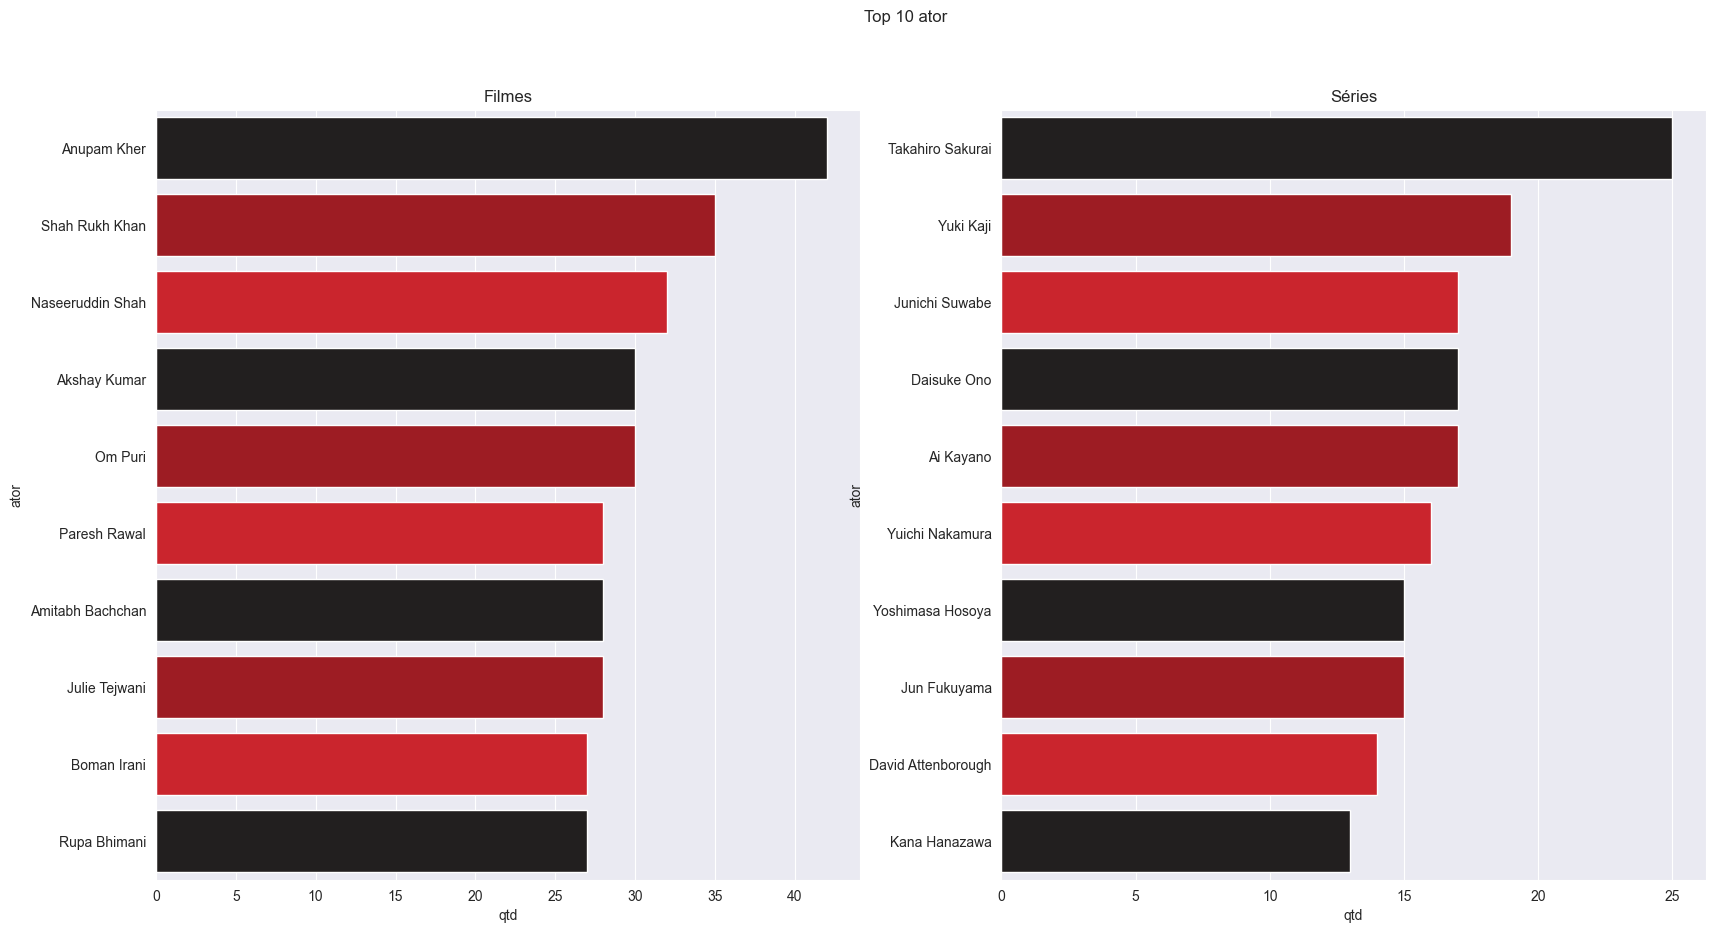

In [53]:
#Top 10 atores

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

sns.barplot(data=df_qtd_ator.loc[df_qtd_ator.type == "Movie"][:10], x="qtd", y="ator", palette=paleta_netflix, ax=axes[0])
axes[0].set_title('Filmes')

sns.barplot(data=df_qtd_ator.loc[df_qtd_ator.type != "Movie"][:10], x="qtd", y="ator", palette=paleta_netflix, ax=axes[1])
axes[1].set_title('Séries')

fig.suptitle("Top 10 ator")
plt.show()

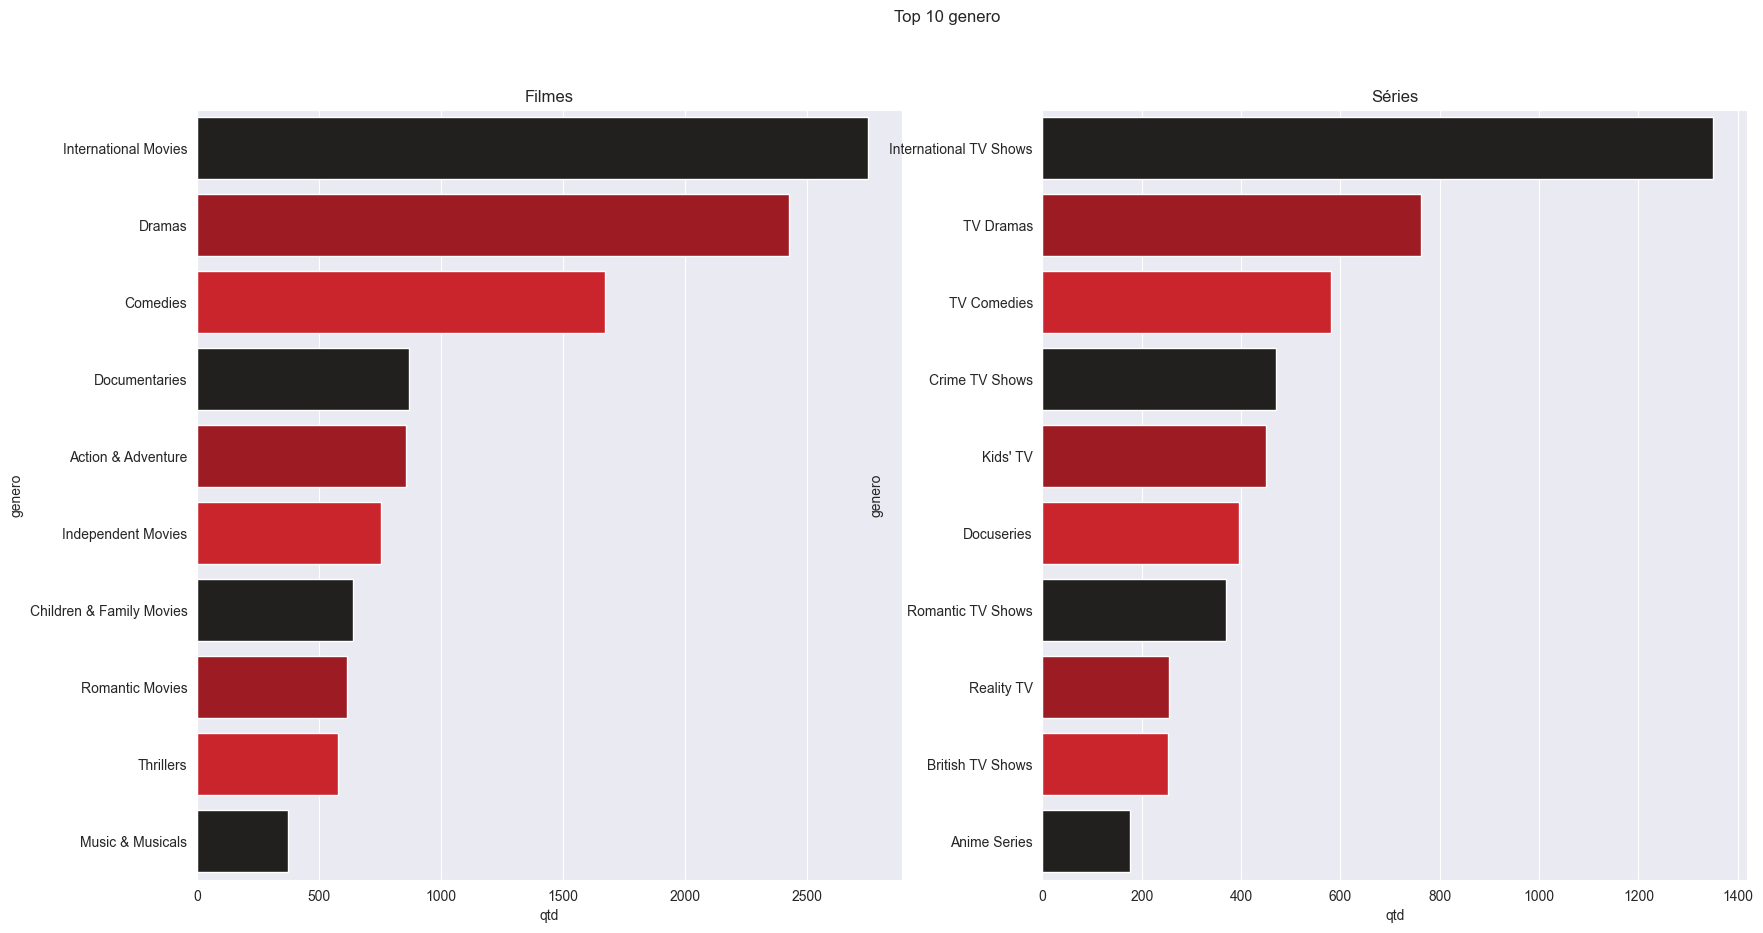

In [54]:
#Top 10 genero

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

sns.barplot(data=df_qtd_genero.loc[df_qtd_genero.type == "Movie"][:10], x="qtd", y="genero", palette=paleta_netflix, ax=axes[0])
axes[0].set_title('Filmes')

sns.barplot(data=df_qtd_genero.loc[df_qtd_genero.type != "Movie"][:10], x="qtd", y="genero", palette=paleta_netflix, ax=axes[1])
axes[1].set_title('Séries')

fig.suptitle("Top 10 genero")
plt.show()

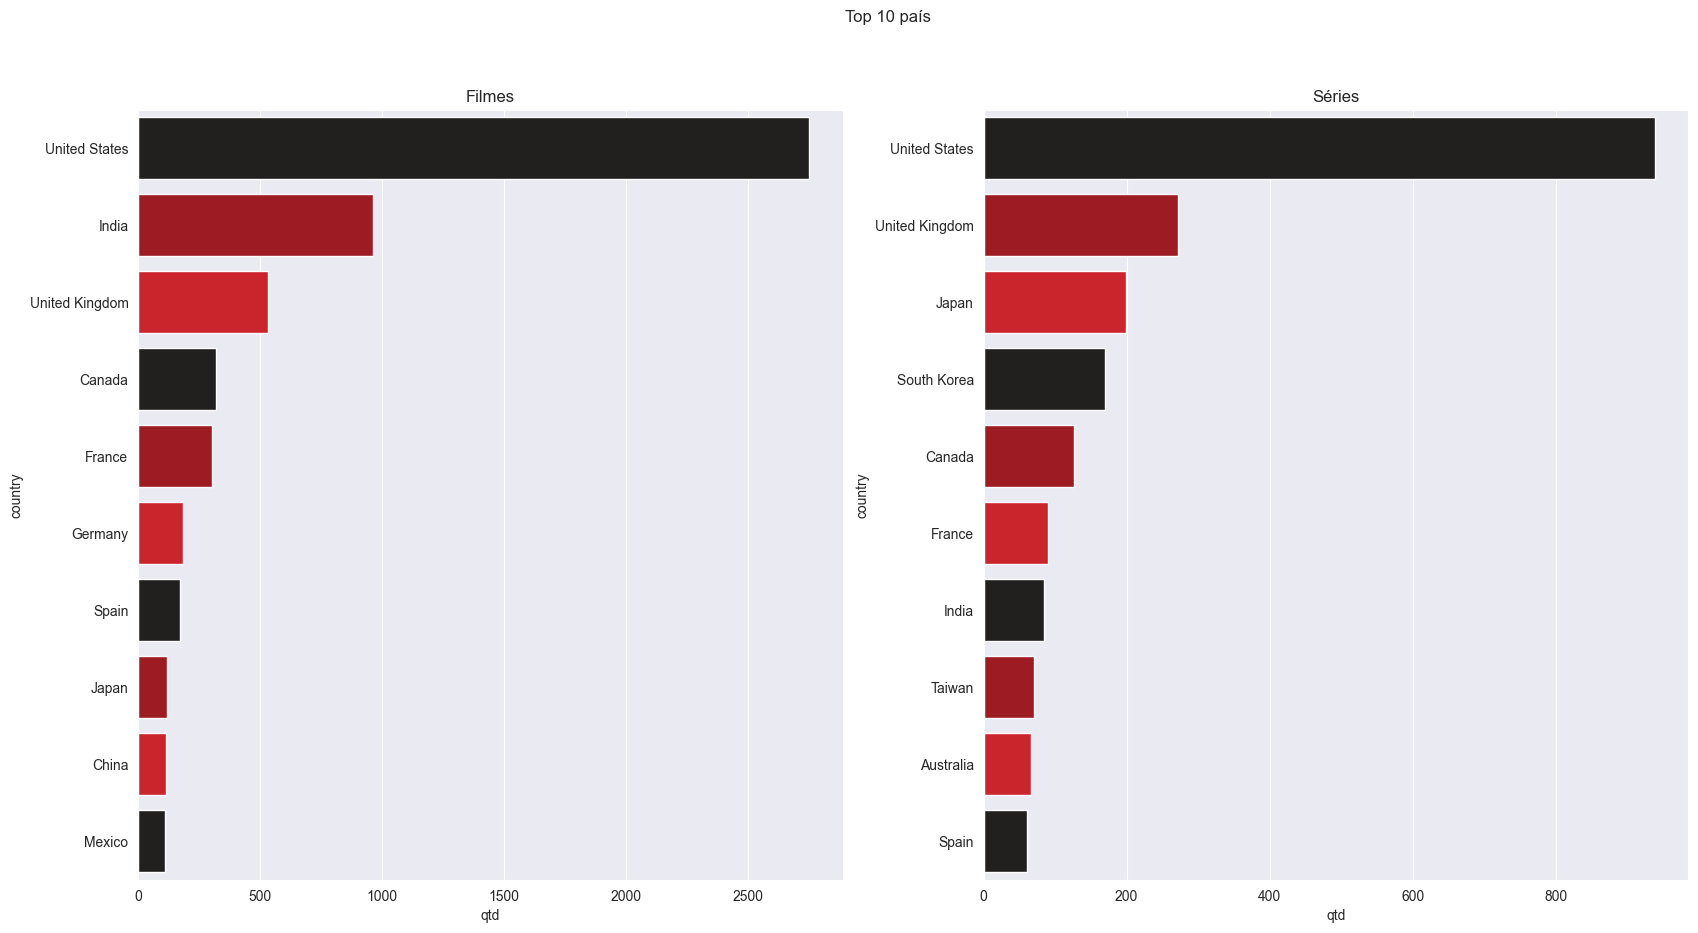

In [55]:
# Top 10 país
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

sns.barplot(data=df_qtd_pais.loc[df_qtd_pais.type == "Movie"][:10], x="qtd", y="country", palette=paleta_netflix, ax=axes[0])
axes[0].set_title('Filmes')

sns.barplot(data=df_qtd_pais.loc[df_qtd_pais.type != "Movie"][:10], x="qtd", y="country", palette=paleta_netflix, ax=axes[1])
axes[1].set_title('Séries')

fig.suptitle("Top 10 país")
plt.show()

In [24]:
#Quais são as séries mais atuais e as mais antigas?

#Mais antigos
df[["title", "year_added_char"]].sort_values(by="year_added_char", ascending=True)[:10]

,title,year_added_char
5957,To and From New York,2008
6611,Dinner for Five,2008
5956,Just Another Love Story,2009
5955,Splatter,2009
7370,Mad Ron's Prevues from Hell,2010
5952,Victim of Beauty,2011
5942,A Stoning in Fulham County,2011
5943,Adam: His Song Continues,2011
5944,Hard Lessons,2011
5945,In Defense of a Married Man,2011


In [25]:
#Quais são as séries mais atuais e as mais antigas?

#Mais recentes
df[["title", "year_added_char"]].sort_values(by="year_added_char", ascending=False)[:10]

,title,year_added_char
6806,Friends,N/A
8182,The Adventures of Figaro Pho,N/A
6901,Gunslinger Girl,N/A
6174,Anthony Bourdain: Parts Unknown,N/A
7196,Kikoriki,N/A
6066,A Young Doctor's Notebook and Other Stories,N/A
7254,La Familia P. Luche,N/A
7406,Maron,N/A
7847,Red vs. Blue,N/A
6795,Frasier,N/A


In [26]:
#Qual filme e série possuem maior duração de tempo?

#Menor duração
df[["title", "type", "duration_aux"]].sort_values(by="duration_aux", ascending=True)[:10]

,title,type,duration_aux
2108,Goedam,TV Show,1
2306,A Touch of Green,TV Show,1
2307,Abby Hatcher,TV Show,1
2313,Say I Do,TV Show,1
2318,Trotro,TV Show,1
2320,BNA,TV Show,1
2322,Homemade,TV Show,1
4874,A Little Help with Carol Burnett,TV Show,1
2329,All For Love,TV Show,1
7505,Monty Don's Italian Gardens,TV Show,1


In [27]:
#Qual filme e série possuem maior duração de tempo?

#Maior duração
df[["title", "type", "duration_aux"]].sort_values(by="duration_aux", ascending=False)[:10]

,title,type,duration_aux
4253,Black Mirror: Bandersnatch,Movie,312
717,Headspace: Unwind Your Mind,Movie,273
2491,The School of Mischief,Movie,253
2487,No Longer kids,Movie,237
2484,Lock Your Girls In,Movie,233
2488,Raya and Sakina,Movie,230
166,Once Upon a Time in America,Movie,229
7932,Sangam,Movie,228
1019,Lagaan,Movie,224
4573,Jodhaa Akbar,Movie,214


In [28]:
#Qual o país com a maior quantidade de filmes e séries?

df["country"].value_counts().sort_values(ascending=False)[:10]

United States     2818
India              972
N/A                831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

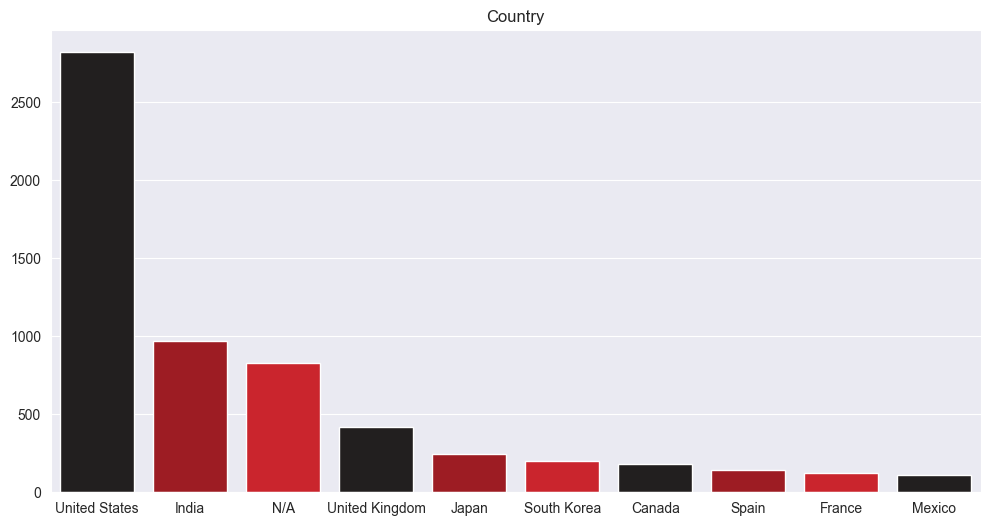

In [29]:
#Qual o país com a maior quantidade de filmes e séries?

plt.figure(figsize=(12,6))
sns.barplot(x=df["country"].value_counts().sort_values(ascending=False)[:10].index, y=df["country"].value_counts().sort_values(ascending=False)[:10].values, palette=paleta_netflix)
plt.title("Country")
plt.show()

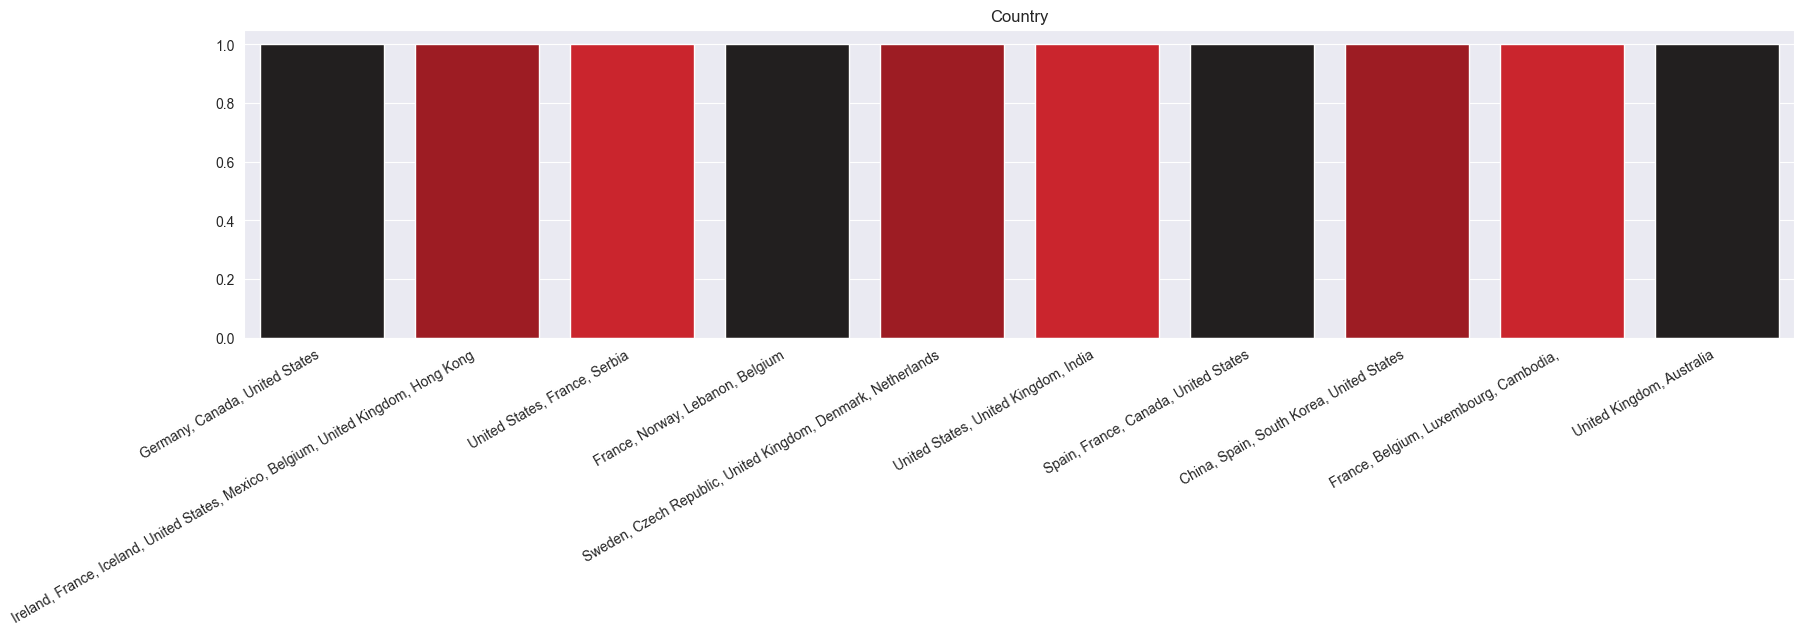

In [31]:
#Qual o país com a menor quantidade de filmes e séries?

plt.figure(figsize=(20,4))
sns.barplot(x=df["country"].value_counts().sort_values(ascending=True)[:10].index, y=df["country"].value_counts().sort_values(ascending=True)[:10].values, palette=paleta_netflix)
plt.title("Country")
plt.xticks(rotation=30,ha="right")
plt.show()

In [56]:
#Cria coluna de classificação indicativa descrição e perfil

df_qtd_class_ind = df.groupby(by=['type', 'rating', 'rating_profile', 'rating_desc'], as_index=False)['show_id'].count()
df_qtd_class_ind.rename(columns={'show_id':'qtd'}, inplace=True)
df_qtd_class_ind

,type,rating,rating_profile,rating_desc,qtd
0,Movie,G,Kids,Adequado para o público em geral,41
1,Movie,N/A,Sem Informação,Sem Informação,5
2,Movie,NC-17,Adults,Impróprio para menores de 17 anos,3
3,Movie,NR,Adults,Restrito. Pode ser impróprio para menores de 1...,75
4,Movie,PG,Kids,Orientação parental sugerida,287
5,Movie,PG-13,Teens,Pode ser impróprio para menores de 13 anos,490
6,Movie,R,Adults,Restrito. Pode ser impróprio para menores de 1...,797
7,Movie,TV-14,Teens,Não recomendado para menores de 14 anos,1427
8,Movie,TV-G,Kids,Adequado para o público em geral,126
9,Movie,TV-MA,Adults,Não recomendado para menores de 17 anos,2062


In [58]:
df_qtd_class_ind2 = df_qtd_class_ind[["type", "rating_profile", "qtd"]].sort_values(by=['type', 'qtd'], ascending=False, ignore_index=True)

filmes_class_ind = df_qtd_class_ind2.loc[df_qtd_class_ind2['type'] == 'Movie']
series_class_ind = df_qtd_class_ind2.loc[df_qtd_class_ind2['type'] == 'TV Show']

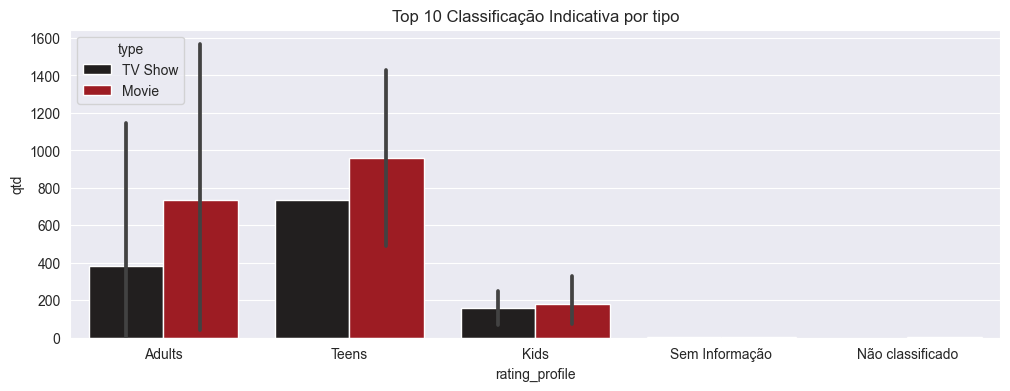

In [59]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_qtd_class_ind2, x="rating_profile", y="qtd", hue='type', palette=paleta_netflix)
plt.title("Top 10 Classificação Indicativa por tipo")

# plt.text(5, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
plt.show()

In [36]:
from PIL import Image

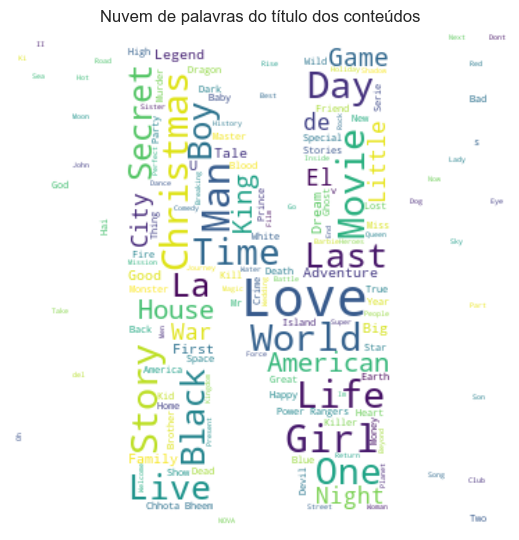

In [50]:
# Preparação da descrição (description) para representação em WordCloud.

mask2 = np.array(Image.open('src/png-transparent-netflix-logo-movie-social-social-media-video-social-media-logos-icon-thumbnail.png'))

text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'white', width = 700,  height = 500, max_words = 150, mask = mask2).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Nuvem de palavras do título dos conteúdos")
plt.show()

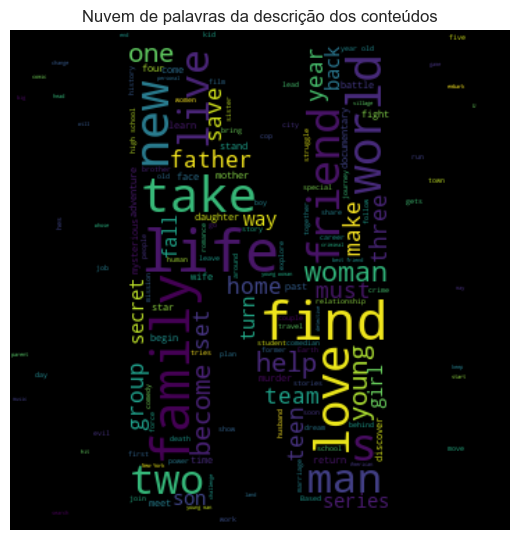

In [46]:
# Preparação da descrição (description) para representação em WordCloud.

mask1 = np.array(Image.open('src/png-transparent-netflix-logo-movie-social-social-media-video-social-media-logos-icon-thumbnail.png'))

text = str(list(df['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'black', width = 700,  height = 500, max_words = 150, mask = mask1).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Nuvem de palavras da descrição dos conteúdos")
plt.show()

## Deploy - Streamlit
Nesta etapa é realizada a exportação das tabelas a serem utilizadas pelo app no Streamlit, e criaçao de funções para facilitar a etapa de visualização dos dados, esta tem por objetivo automatizar o fluxo para a criação das visualizações, como também o acesso as bases de forma estrturada.

In [102]:
df.to_csv('data/tb_netflix.txt', header=True, index=None, sep=';')

df_qtd_diretor.to_csv('data/tb_netflix_diretor.txt', header=True, index=None, sep=';')
df_qtd_ator.to_csv('data/tb_netflix_ator.txt', header=True, index=None, sep=';')
df_qtd_genero.to_csv('data/tb_netflix_genero.txt', header=True, index=None, sep=';')
df_qtd_pais.to_csv('data/tb_netflix_pais.txt', header=True, index=None, sep=';')
df_qtd_ano_mes_added.to_csv('data/tb_netflix_ano_mes_add.txt', header=True, index=None, sep=';')
# df_qtd_ano_mes_added_filmes.to_csv('data/tb_netflix_filmes_ano_mes_add.txt', header=True, index=True, sep=';')
# df_qtd_ano_mes_added_series.to_csv('data/tb_netflix_series_ano_mes_add.txt', header=True, index=None, sep=';')
# df_qtd_ano_mes_release_year.to_csv('data/tb_netflix_diretor.txt', header=True, index=None, sep=';')

In [103]:
def grafico_contagem(df, x:None, y:None, titulo, paleta_cores:None):
    plt.figure(figsize=(8,3))
    ax = sns.countplot(data=df, y=x,
                       order=df[x].value_counts(ascending=False).index,
                       palette=paleta_cores)

    type_values = df[x].value_counts(ascending=False).values
    type_perc_values = df[x].value_counts(ascending=False, normalize=True).values * 100
    type_labels = [f'{value[0]} ({value[1]:1.2f}%)' for value in zip(type_values, type_perc_values)]
    ax.bar_label(container=ax.containers[0], labels=type_labels)

    plt.title(titulo)
    plt.xlabel(None)
    plt.ylabel(None)
    ax.set(xticklabels=[])
    plt.show()

In [104]:
def grafico_linha(df, x:None, y:None, legenda:None, titulo:None, paleta_cores:None):
    plt.figure(figsize=(12,4))
    sns.lineplot(data=df, x=x, y=y, hue=legenda, palette=paleta_cores)
    plt.title(titulo)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

In [105]:
def grafico_mapacalor(df, x:None, y:None, legenda:None, titulo:None, paleta_cores:None):
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(df, annot=True, fmt="d", linewidths=.5, ax=ax, cmap=paleta_cores)
    plt.title(titulo)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

In [106]:
def grafico_barras(df, x:None, y:None, legenda:None, titulo:None, paleta_cores:None):
    plt.figure(figsize=(20,10))
    sns.barplot(data=df, x=x, y=y, hue=legenda, palette=paleta_cores)
    plt.title(titulo)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

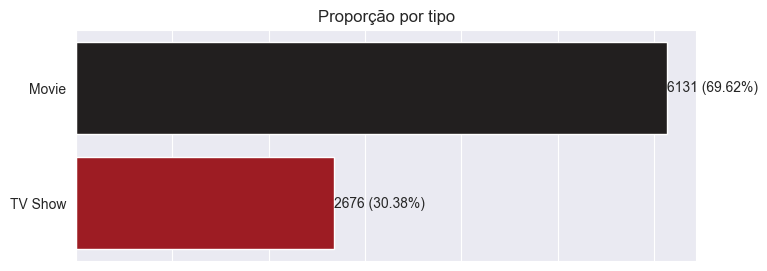

In [107]:
grafico_contagem(df, x='type', y=None, titulo="Proporção por tipo", paleta_cores=paleta_netflix)

C:\Users\Luiza Lovo\AppData\Local\Temp\ipykernel_1232\3729007832.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df, x=x, y=y, hue=legenda, palette=paleta_cores)


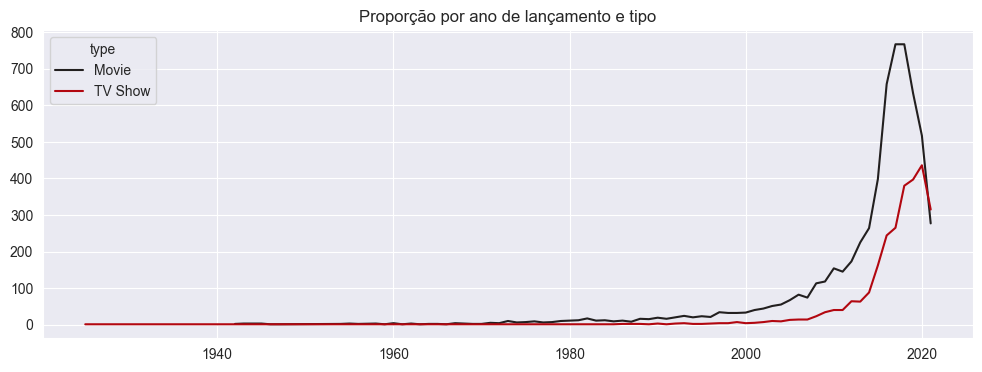

In [108]:
grafico_linha(df=df_qtd_ano_mes_release_year, x='release_year', y='qtd', legenda='type', titulo="Proporção por ano de lançamento e tipo", paleta_cores=paleta_netflix)


C:\Users\Luiza Lovo\AppData\Local\Temp\ipykernel_1232\3729007832.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df, x=x, y=y, hue=legenda, palette=paleta_cores)


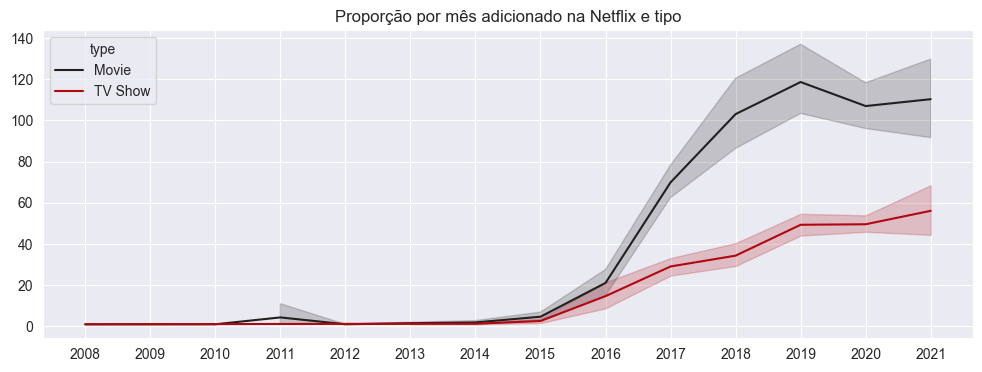

In [109]:
grafico_linha(df=df_qtd_ano_mes_added, x='year_added_char', y='qtd', legenda='type', titulo="Proporção por mês adicionado na Netflix e tipo", paleta_cores=paleta_netflix)


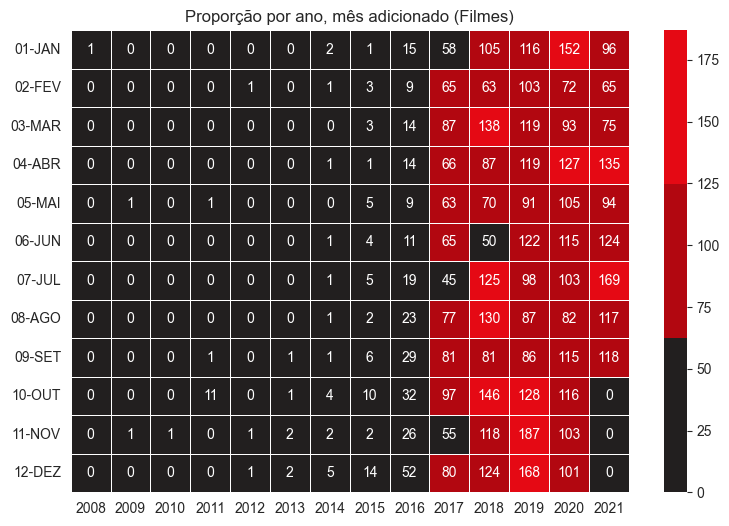

In [110]:
grafico_mapacalor(df=df_qtd_ano_mes_added_filmes, x=None, y=None, legenda=None,  titulo="Proporção por ano, mês adicionado (Filmes)", paleta_cores=paleta_netflix)


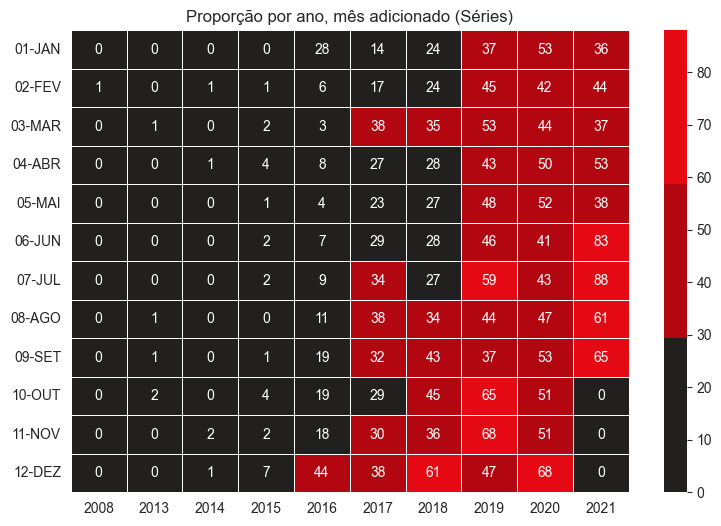

In [111]:
grafico_mapacalor(df=df_qtd_ano_mes_added_series, x=None, y=None, legenda=None,  titulo="Proporção por ano, mês adicionado (Séries)", paleta_cores=paleta_netflix)


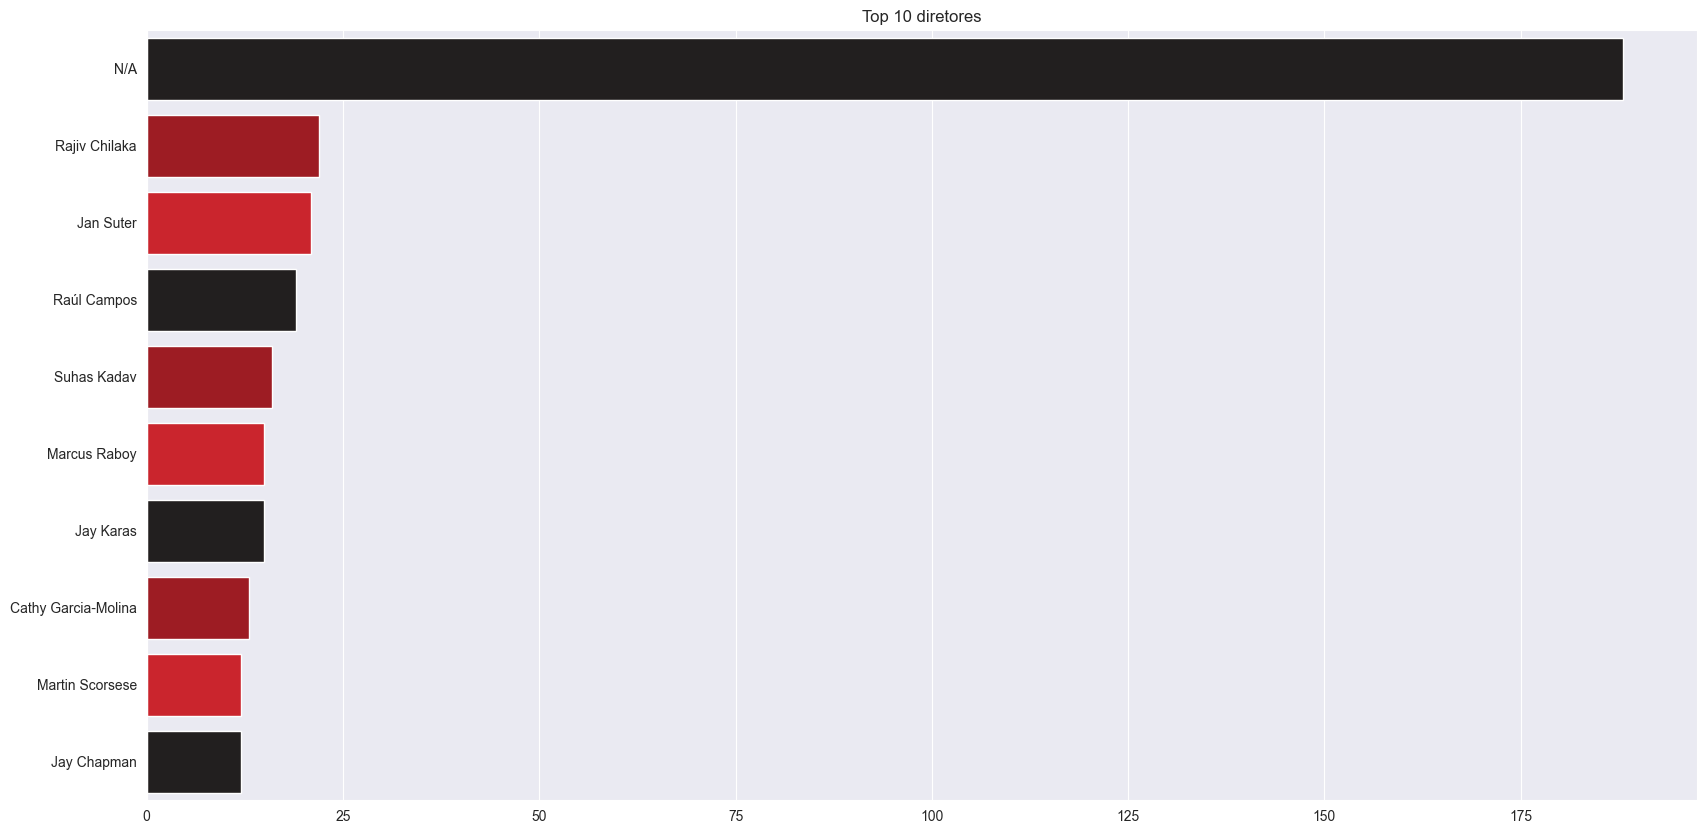

In [112]:
grafico_barras(df=df_qtd_diretor.loc[df_qtd_diretor.type == "Movie"][:10], x="qtd", y="diretor", legenda=None, titulo="Top 10 diretores", paleta_cores=paleta_netflix)


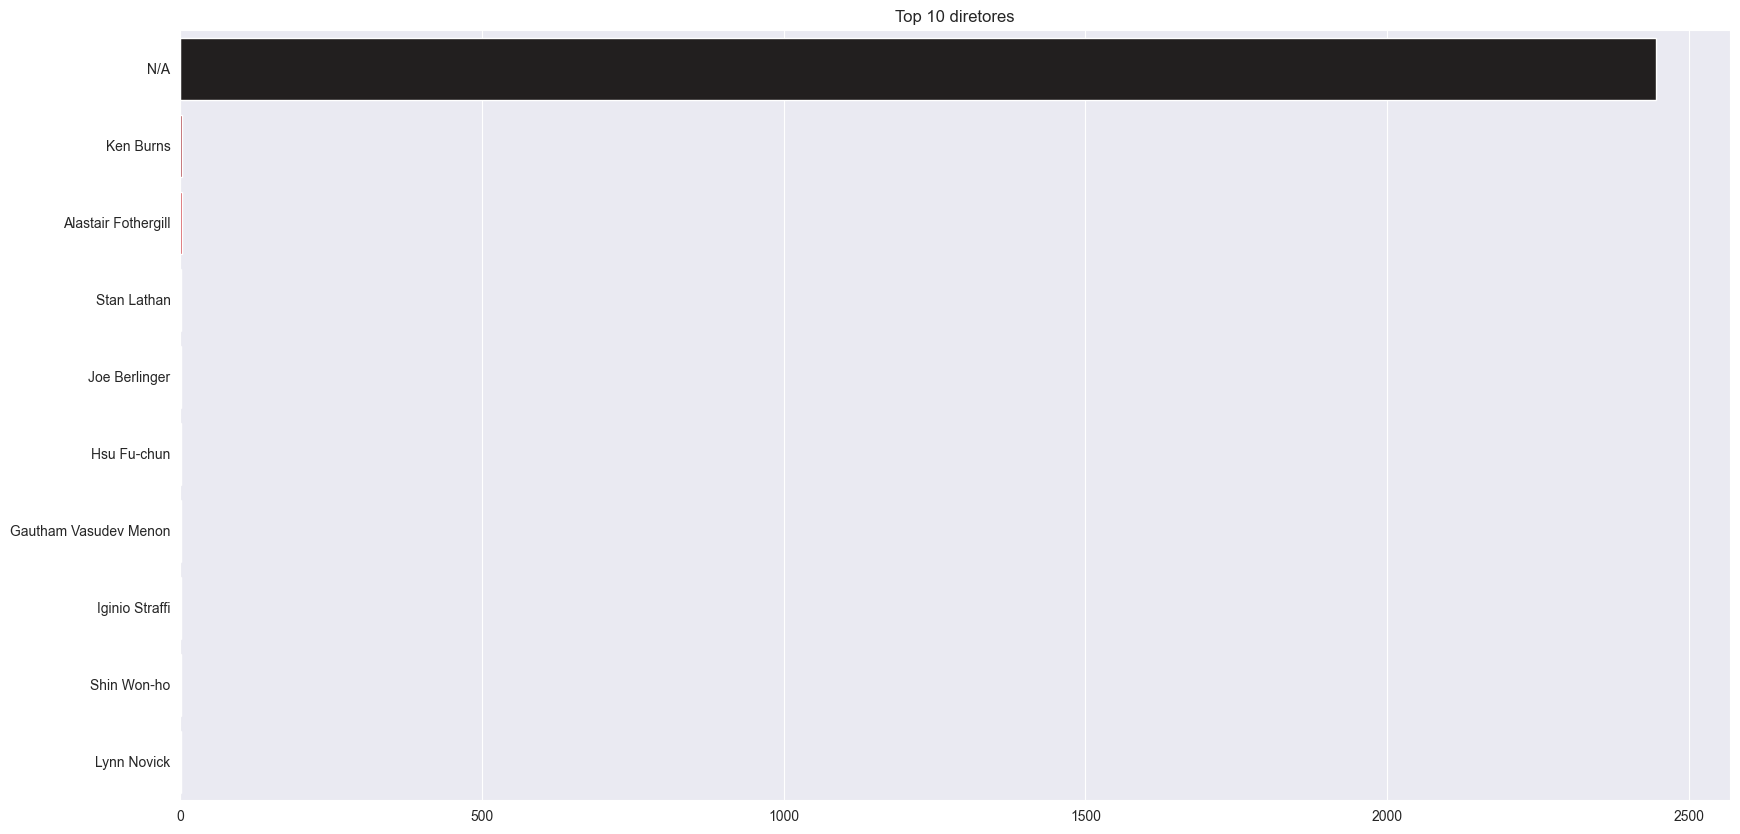

In [113]:
grafico_barras(df=df_qtd_diretor.loc[df_qtd_diretor.type != "Movie"][:10], x="qtd", y="diretor", legenda=None, titulo="Top 10 diretores", paleta_cores=paleta_netflix)
